# Exploratory Data Analysis: Pima Indians Diabetes
---------------
## Context
---------------

Diabetes is a common global disease, with an increasing number of patients each year. Its root cause is unknown, but genetics and lifestyle are believed to be major factors. A study of the Pima tribe revealed early onset diabetes in females over 21 years old, all of Pima Indian ancestry.

-------------------------
## Data Dictionary
-------------------------

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
* Age: Age in years
* Outcome: Class variable (0: a person is not diabetic or 1: a person is diabetic)


-------------------------
## Objective
-------------------------
Conduct an exploratory data analysis to identify the factors or features that affect the diagnosis of diabetes in Pima women.

-------------------------
## Conclusions and Key Insights
-------------------------
**1.** The **data within the dataset is imbalanced** (65% of observations are labeled as 'No Diabetes' while the rest 35% is 'Has Diabetes') - this needs proper **normalization** to ensure accurate and effective Machine Learning application.

**2.** Bivariate data analysis has revealed that women with a diabetes diagnosis and Outcome label of 1 differ significantly from healthy women (Outcome of 0) in terms of:

- **Age**: The median age of a woman with diabetes is 36, while a median healthy woman is almost 10 years younger.

- **DiabetesPedigreeFunction**: The value is 0.45 for an unhealthy woman and 0.34 for a healthy one.

- **Glucose**: The value is 140 for a diagnosed woman and about 108 for an undiagnosed one.

- **SkinThickness**: The median value is 27 for a diabetes woman and 21 for a non-diabetic woman.

- **Pregnancies**: On average, a diagnosed woman has four pregnancies compared to two for a non-diagnosed woman.

**3.** Multivariate data analysis confirmed that there are **high correlations between the following variable pairs: Age / Pregnancies, SkinThickness / BMI, Glucose / Insulin**, etc. These observations suggest that **feature engineering** should become the next stage of analysis to follow in order to come up with more insightful observations, especially in terms of further Machine Learning application.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("viridis")
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1. Basic dataset overview: shape, datatypes, missing and duplicated data.

In [2]:
pima = pd.read_csv("diabetes.csv")
# reading the dataset

In [3]:
display(pima.info(), pima.head())
# checking the data head and info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima['Outcome'] = pima['Outcome'].astype("category")
# changing datatype for 'Outcome' since this data is basically categorical (reflecting classes)

In [5]:
pima.info()
# checking for a newly assigned data type for 'Outcome'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [6]:
pima.isna().values.any()
# missing values analysis (no missing values found)

False

In [7]:
pima.duplicated().sum()
# duplicated data check (no duplicated data observed)

0

In [8]:
pima.describe().T
# the summary statistics - for numerical variables

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.675781,30.436252,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.250000,12.117203,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,26.447917,9.733872,7.000,20.00000,23.0000,32.00000,99.00
Insulin,768.0,118.270833,93.243829,14.000,79.00000,79.0000,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


### Insights.

The dataset consists of one dependent (or target) variable which is 'Outcome' indicating whether a person is diagnosed Diabetes (1) or not (0), and several independent variables which indicate certain biological and medical parameters (predictors).

It comprises 9 variables and 768 observations, with no instances of missing or duplicated data - an unusual and highly desirable trait that indicates the data is clean. However, it is worth noting that according to summary statistical analysis (table above) a majority of the variables appear to be skewed and contain a significant number of outliers.

### **2.1. Univariate Analysis - Categorical Data**

In [9]:
pima.describe(include = ["category"]).T
# the summary statistics for 'Outcome' as categorical data from our dataset

,count,unique,top,freq
Outcome,768,2,0,500


In [10]:
# looking for distribution of categorical 'Outcome' between classes 0 and 1, in absolute values
for i in pima.select_dtypes(['category']).columns:
    print('Unique values in',i, 'are :')
    print(pima[i].value_counts())
    print('*'*40)

Unique values in Outcome are :
0    500
1    268
Name: Outcome, dtype: int64
****************************************


In [11]:
# looking for distribution of categorical 'Outcome' between classes 0 and 1, in relative values
for i in  pima.select_dtypes(['category']).columns:
    print('Unique values in',i, 'are :')
    print(pima[i].value_counts(normalize = True))
    print('*'*40)

Unique values in Outcome are :
0    0.651042
1    0.348958
Name: Outcome, dtype: float64
****************************************


In [12]:
# the function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
   
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05   # width of the plot
        y = p.get_y() + p.get_height()             # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

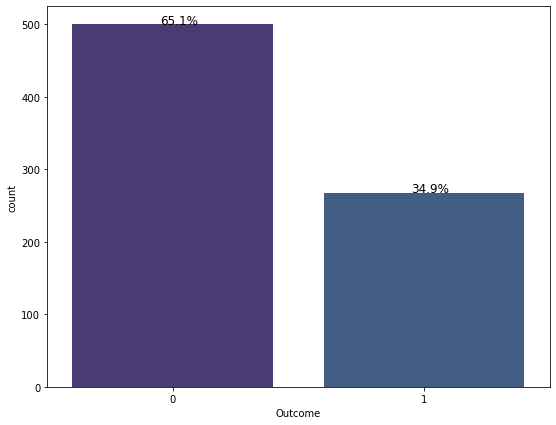

In [13]:
plt.figure(figsize=(9,7))
ax = sns.countplot(pima['Outcome'])
perc_on_bar(ax,pima['Outcome'])

### Insights. 
The dataset lacks normalization as there is a **significant imbalance in the number of observations with undiagnosed diabetes (Outcome = 0) compared to diagnosed cases (Outcome = 1)**. Specifically, the dataset contains 500 instances (i.e., 65%) of non-diabetic cases and 268 instances (i.e., 35%) of diagnosed diabetes cases. To ensure accurate and effective Machine Learning application in the future, proper normalization of the dataset is necessary.

### **2.2. Univariate Analysis - Numerical Data**

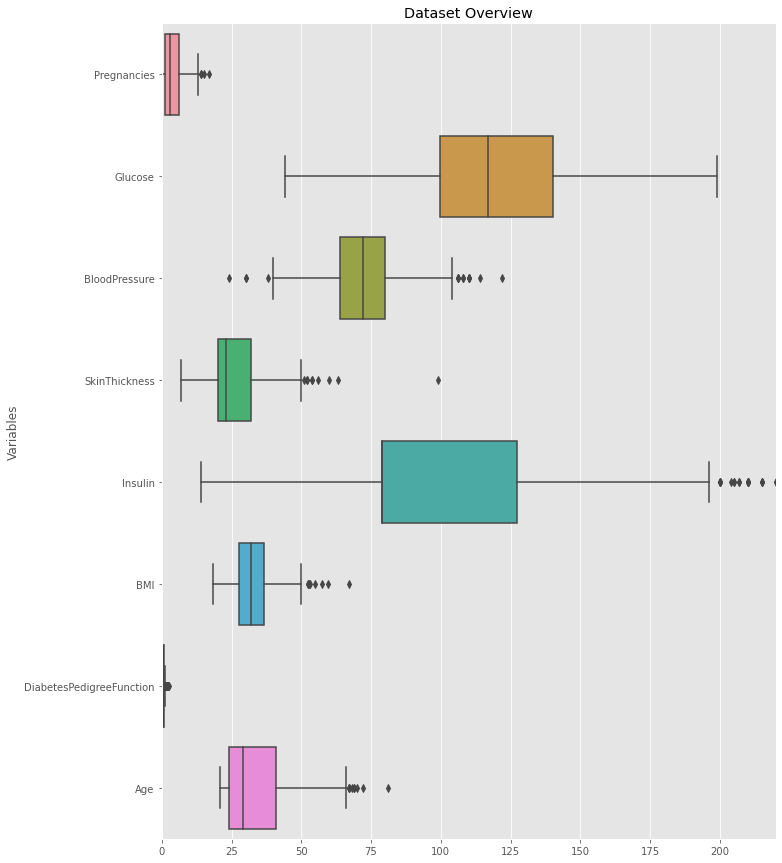

In [14]:
plt.style.use('ggplot')

f, ax = plt.subplots(figsize=(11, 15))

ax.set(xlim = (-.05, 220))
plt.ylabel('Variables')
plt.title("Dataset Overview")
ax = sns.boxplot(data = pima, 
  orient = 'h')

In [15]:
# designing the function helping to create both boxplot and histogram for a particular numerical variable:
# it takes a numerical column as an input and returns boxplot and histogram for it

def histogram_boxplot(feature, figsize=(9,7), bins = None):

    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

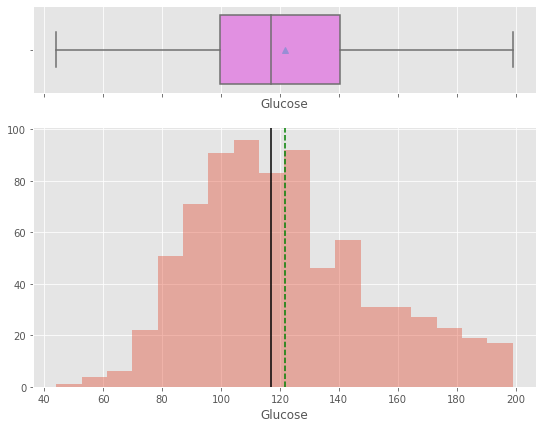

In [16]:
histogram_boxplot(pima['Glucose'])

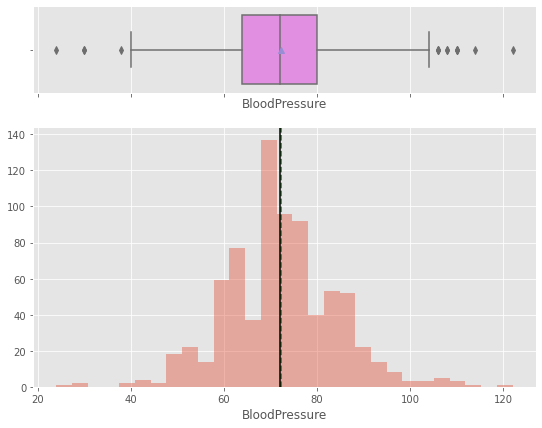

In [17]:
histogram_boxplot(pima['BloodPressure'])

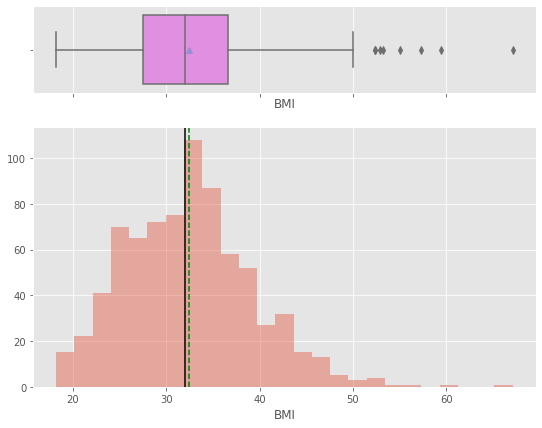

In [18]:
histogram_boxplot(pima['BMI'])

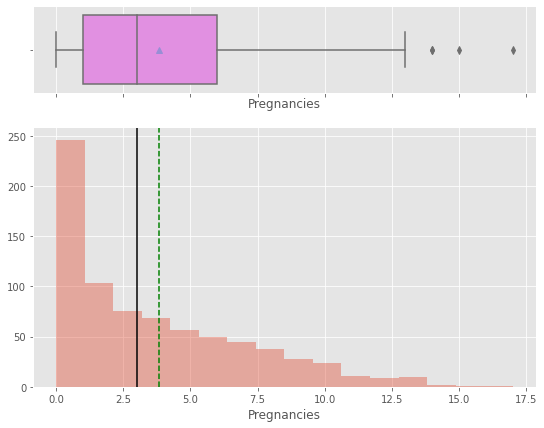

In [19]:
histogram_boxplot(pima['Pregnancies'])

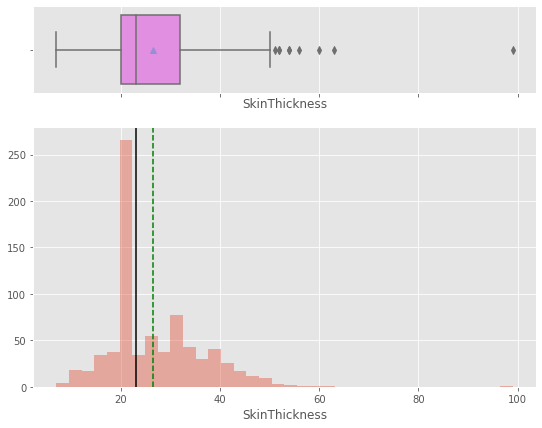

In [20]:
histogram_boxplot(pima['SkinThickness'])

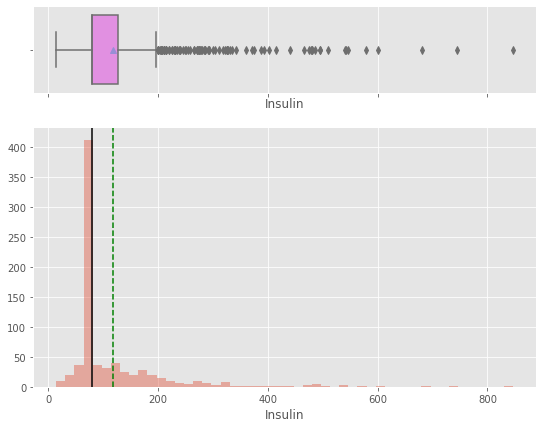

In [21]:
histogram_boxplot(pima['Insulin'])

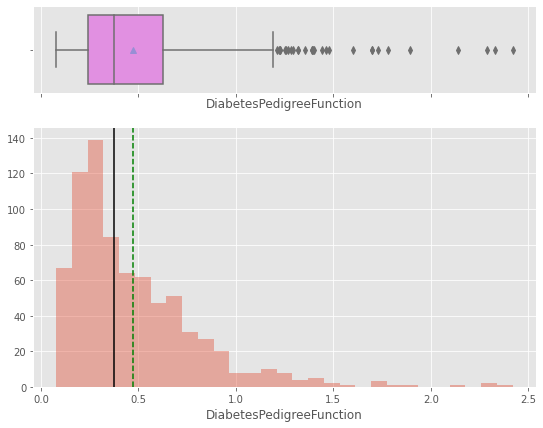

In [22]:
histogram_boxplot(pima['DiabetesPedigreeFunction'])

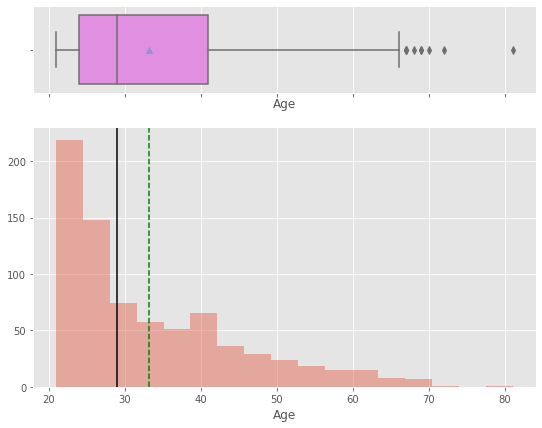

In [23]:
histogram_boxplot(pima['Age'])

### Insights.

**Most of the data variables appear to follow a relatively normal distribution, although many still contain outliers**. However, some variables exhibit more significant skewness, including Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction, and Age. Of these, the variables with **the highest number of outliers are Insulin and DiabetesPedigreeFunction**. 

### **3. Bivariate Analysis**

In [24]:
pima_outcome_1 = pima[pima['Outcome'] == 1]
pima_outcome_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000,1.7500,4.000,8.000,17.00
Glucose,268.0,142.152985,29.550866,78.000,119.0000,140.000,167.000,199.00
BloodPressure,268.0,74.944030,12.019672,30.000,68.0000,74.000,82.000,114.00
SkinThickness,268.0,28.731343,10.436298,7.000,20.0000,27.000,36.000,99.00
Insulin,268.0,141.014925,112.274909,14.000,79.0000,79.000,167.250,846.00
BMI,268.0,35.381288,6.596733,22.900,30.9000,34.250,38.775,67.10
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088,0.2625,0.449,0.728,2.42
Age,268.0,37.067164,10.968254,21.000,28.0000,36.000,44.000,70.00


In [25]:
pima_outcome_1 = pima[pima['Outcome'] == 0]
pima_outcome_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.298000,3.017185,0.000,1.00000,2.000,5.00000,13.000
Glucose,500.0,110.700000,24.712901,44.000,93.00000,107.500,125.00000,197.000
BloodPressure,500.0,70.806000,11.932860,24.000,63.50000,70.000,78.00000,122.000
SkinThickness,500.0,25.224000,9.113503,7.000,20.00000,21.000,31.00000,60.000
Insulin,500.0,106.080000,78.691208,15.000,79.00000,79.000,105.00000,744.000
BMI,500.0,30.880066,6.503051,18.200,25.75000,30.400,35.30000,57.300
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
Age,500.0,31.190000,11.667655,21.000,23.00000,27.000,37.00000,81.000


In [26]:
# calculate the means by 'Outcome' to fundamentally see how it differs for 'Diabetes' and 'Non Diabetes' observations
numerical_col = pima.select_dtypes(include=np.number).columns.tolist()
pima.groupby(['Outcome'])[numerical_col].mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.700000,70.80600,25.224000,106.080000,30.880066,0.429734,31.190000
1,4.865672,142.152985,74.94403,28.731343,141.014925,35.381288,0.550500,37.067164


In [27]:
# select numerical columns
numerical_col = pima.select_dtypes(include=np.number).columns.tolist()

# calculate means by 'Outcome'
means = pima.groupby(['Outcome'])[numerical_col].mean()

# calculate percent difference between means - to see where the difference is the most drastic
percent_diff = ((means.iloc[1] - means.iloc[0]) / means.iloc[0]) * 100

# print means and percent differences between them
print(means)
print("\nPercent difference between means:")
print(percent_diff)

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.700000       70.80600      25.224000  106.080000   
1           4.865672  142.152985       74.94403      28.731343  141.014925   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.880066                  0.429734  31.190000  
1        35.381288                  0.550500  37.067164  

Percent difference between means:
Pregnancies                 47.534010
Glucose                     28.412814
BloodPressure                5.844180
SkinThickness               13.904786
Insulin                     32.932622
BMI                         14.576463
DiabetesPedigreeFunction    28.102501
Age                         18.843104
dtype: float64


In [28]:
# select numerical columns
numerical_col = pima.select_dtypes(include=np.number).columns.tolist()

# calculate means by 'Outcome'
medians = pima.groupby(['Outcome'])[numerical_col].median()

# calculate percent difference between means - to see where the difference is the most drastic
percent_diff = ((medians.iloc[1] - medians.iloc[0]) / medians.iloc[0]) * 100

# print means and percent differences between them
print(medians)
print("\nPercent difference between medians:")
print(percent_diff)

         Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Outcome                                                                       
0                2.0    107.5           70.0           21.0     79.0  30.40   
1                4.0    140.0           74.0           27.0     79.0  34.25   

         DiabetesPedigreeFunction   Age  
Outcome                                  
0                           0.336  27.0  
1                           0.449  36.0  

Percent difference between medians:
Pregnancies                 100.000000
Glucose                      30.232558
BloodPressure                 5.714286
SkinThickness                28.571429
Insulin                       0.000000
BMI                          12.664474
DiabetesPedigreeFunction     33.630952
Age                          33.333333
dtype: float64


<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

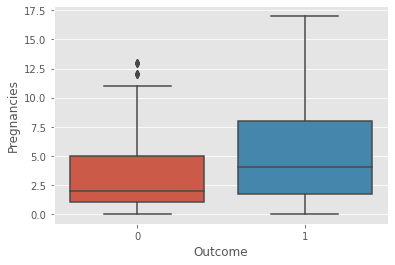

In [29]:
# Outcome vs. Pregnancies
sns.boxplot(pima["Outcome"],pima['Pregnancies'])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

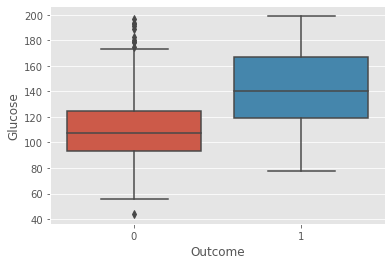

In [30]:
# Outcome vs. Glucose
sns.boxplot(pima["Outcome"],pima['Glucose'])

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

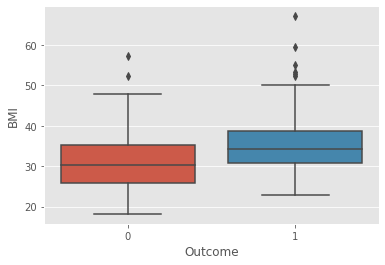

In [31]:
# Outcome vs. BMI
sns.boxplot(pima["Outcome"],pima['BMI'])

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

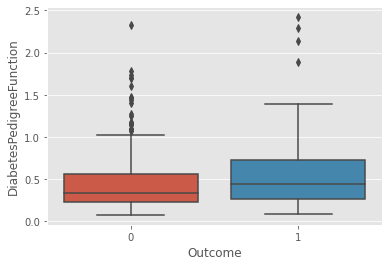

In [32]:
# Outcome vs. DiabetesPedigreeFunction
sns.boxplot(pima["Outcome"],pima['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

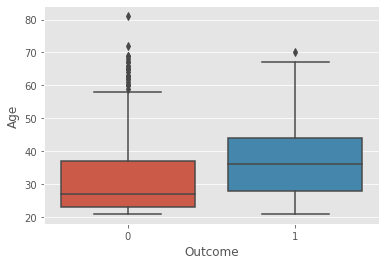

In [33]:
# Outcome vs. Age
sns.boxplot(pima["Outcome"],pima['Age'])

In [34]:
# Outcome vs. BloodPressure
# sns.boxplot(pima["Outcome"],pima['BloodPressure'])

In [35]:
# Outcome vs. SkinThickness
# sns.boxplot(pima["Outcome"],pima['SkinThickness'])

In [36]:
# Outcome vs. Insulin
# sns.boxplot(pima["Outcome"],pima['Insulin'])

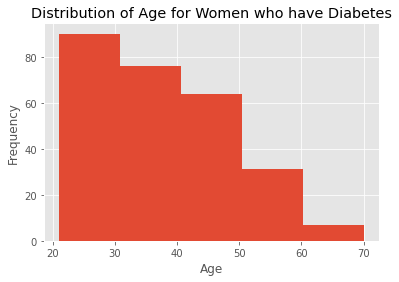

In [37]:
plt.hist(pima[pima['Outcome'] == 1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

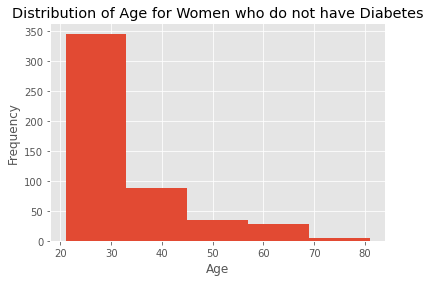

In [38]:
plt.hist(pima[pima['Outcome'] == 0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

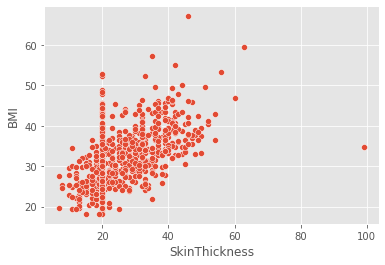

In [39]:
sns.scatterplot(pima['SkinThickness'],pima['BMI'])

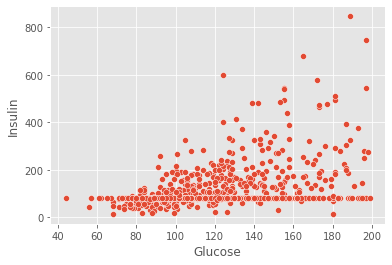

In [40]:
sns.scatterplot(x = 'Glucose', y = 'Insulin', data = pima)
plt.show()

### Insights.

Bivariate data analysis has revealed that women with a diabetes diagnosis and Outcome label of 1 differ significantly from healthy women (Outcome of 0) in terms of:

- **Age**: The median age of a woman with diabetes is 36, while a median healthy woman is almost 10 years younger.

- **DiabetesPedigreeFunction**: The value is 0.45 for an unhealthy woman and 0.34 for a healthy one.

- **Glucose**: The value is 140 for a diagnosed woman and about 108 for an undiagnosed one.

- **SkinThickness**: The median value is 27 for a diabetes woman and 21 for a non-diabetic woman.

- **Pregnancies**: On average, a diagnosed woman has four pregnancies compared to two for a non-diagnosed woman.

Multivariate analysis is necessary to show correlations between these variables. For example, it's reasonable to suggest that there might be a positive correlation between the following pairs: Age / Pregnancies, SkinThickness / BMI, Glucose / Insulin, etc.

These observations might suggest that feature engineering is the next stage of analysis to follow in order to come up with more insightful and applicable observations.

### **4. Multivariate Analysis**

In [41]:
corr = pima.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128022,0.208987,0.009393,-0.018780,0.021546,-0.033523,0.544341
Glucose,0.128022,1.000000,0.219765,0.158060,0.396137,0.231464,0.137158,0.266673
BloodPressure,0.208987,0.219765,1.000000,0.130403,0.010492,0.281222,0.000471,0.326791
SkinThickness,0.009393,0.158060,0.130403,1.000000,0.245410,0.532552,0.157196,0.020582
Insulin,-0.018780,0.396137,0.010492,0.245410,1.000000,0.189919,0.158243,0.037676
BMI,0.021546,0.231464,0.281222,0.532552,0.189919,1.000000,0.153508,0.025748
DiabetesPedigreeFunction,-0.033523,0.137158,0.000471,0.157196,0.158243,0.153508,1.000000,0.033561
Age,0.544341,0.266673,0.326791,0.020582,0.037676,0.025748,0.033561,1.000000


<AxesSubplot:>

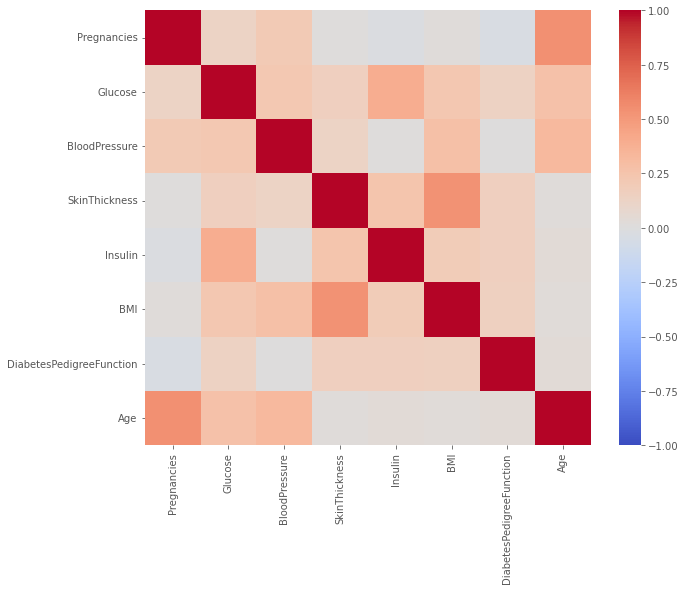

In [42]:
# plotting a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

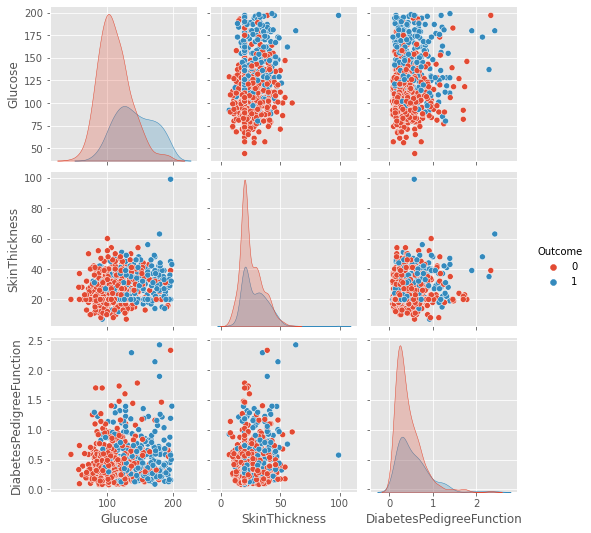

In [43]:
#  a pairplot for the variables 'Glucose', 'SkinThickness', and 'DiabetesPedigreeFunction'
sns.pairplot(data = pima, vars = ['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue = 'Outcome')
plt.show()

### Insights.

Multivariate analysis is necessary to show correlations between these variables. For example, it's reasonable to suggest that there might be a positive correlation between the following pairs: **Age / Pregnancies, SkinThickness / BMI, Glucose / Insulin**, etc.

These observations suggest that feature engineering should become the next stage of analysis to follow in order to come up with more insightful observations.

### 5. Querying particular data (10 random queries)

##### 1. What is the mean of the variable 'BMI'? 

In [44]:
# mean
m = round(pima['BMI'].mean(),1)
print("'BMI' mean is", m)

'BMI' mean is 32.5


##### 2. What is the 'BMI' of the person having the highest 'Glucose'? 

In [45]:
bmi = pima[pima['Glucose'] == pima['Glucose'].max()]['BMI']

##### 3. Build a distribution plot for BMI.

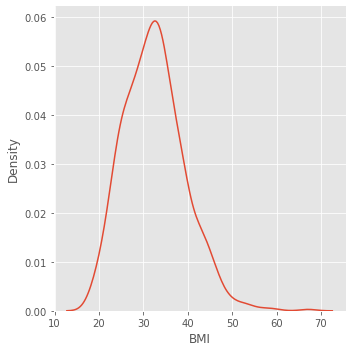

In [46]:
sns.displot(pima['BMI'], kind = 'kde')
plt.show()

##### 4. How many women's 'Glucose' levels are above the mean level of 'Glucose'?

In [47]:
pima[pima['Glucose'] > pima['Glucose'].mean()].shape[0]

343

##### 5. How many women have their 'BloodPressure' equal to the median of 'BloodPressure' and their 'BMI' less than the median of 'BMI'?

In [48]:
pima[(pima['BloodPressure'] == pima['BloodPressure'].median()) & (pima['BMI'] < pima['BMI'].median())].shape[0]

22

##### 6. How many women of age 25 - 40 are diagnosed Diabetis, and not?

In [49]:
# select the rows where Outcome is 1 and Age is between 25 and 40 years
condition = (pima['Outcome'] == 1) & (pima['Age'] >= 25) & (pima['Age'] <= 40)
subset_pima = pima[condition]

# count the number of observations in the subset
count = subset_pima.shape[0]

print("The number of observations with diagnosed Diabetes (Outcome = 1) within the age group of 25.. 40 is:" , count)

The number of observations with diagnosed Diabetes (Outcome = 1) within the age group of 25.. 40 is: 135


In [50]:
# select the rows where Outcome is 1 and Age is between 25 and 40 years
condition = (pima['Outcome'] == 0) & (pima['Age'] >= 25) & (pima['Age'] <= 40)
subset_pima = pima[condition]

# count the number of observations in the subset
count = subset_pima.shape[0]

print("The number of observations with no Diabetes diagnosed (Outcome = 0) within the age group of 25.. 40 is:" , count)

The number of observations with no Diabetes diagnosed (Outcome = 0) within the age group of 25.. 40 is: 220


##### 7. Show top 3 highest and top 3 lowerst Insulin observations within the dataset.

In [51]:
# get the top 3 maximum values in the 'values' column
top_max = pima['Insulin'].nlargest(3)

# get the top 3 minimum values in the 'values' column
top_min = pima['Insulin'].nsmallest(3)

print(top_max)
print(top_min)

13     846
228    744
247    680
Name: Insulin, dtype: int64
445    14
617    15
760    16
Name: Insulin, dtype: int64


##### 8. What is the age of the youngest woman diagnosed Diabetes?

In [52]:
diagnosed_diabetis = pima[pima['Outcome'] == 1]
youngest_diabetic_age = diagnosed_diabetis['Age'].min()
print('The youngest person in a dataset with Diabetis diagnosed is', youngest_diabetic_age, 'years old.')

The youngest person in a dataset with Diabetis diagnosed is 21 years old.


##### 9. What is the age of the oldest woman with no Diabetis?

In [53]:
diagnosed_no_diabetis = pima[pima['Outcome'] == 0]
oldest_non_diabetic_age = diagnosed_no_diabetis['Age'].max()
print('The oldest person in a dataset with no Diabetis diagnosed is', oldest_non_diabetic_age, 'years old.')

The oldest person in a dataset with no Diabetis diagnosed is 81 years old.


##### 10. How many observations in 'Insulin' subset are considered to be outliers?

In [54]:
Q1 = pima['Insulin'].quantile(q = .25)
Q3 = pima['Insulin'].quantile(q = .75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

outliers = pima[(pima['Insulin'] < lower_whisker) | (pima['Insulin'] > upper_whisker)]

count_outliers = outliers.shape[0]
percent_outliers = (outliers.shape[0] / pima['Insulin'].shape[0]) * 100

print("The number of outliers within 'Insulin' data subset is: ", count_outliers)
print("The % of outliers within 'Insulin' data subset is:", round(percent_outliers,2),"%")

The number of outliers within 'Insulin' data subset is:  89
The % of outliers within 'Insulin' data subset is: 11.59 %
